In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## Load the dataset of The Survice of Titanic

In [3]:
titanic = sns.load_dataset('titanic')

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.describe()
titanic_cleaned = titanic.dropna(subset=['age'])

In [6]:
titanic.value_counts(titanic['survived'])

survived
0    549
1    342
Name: count, dtype: int64

In [7]:
titanic.value_counts(titanic['sex'])
#|survived | survived? 0 = No, 1 = yes  |

sex
male      577
female    314
Name: count, dtype: int64

In [8]:
titanic.groupby(['sex','survived']).size()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

In [9]:
num_female_survice = titanic[(titanic['sex']=='female') & (titanic['survived']==1)].shape[0]
num_people_survice = titanic[titanic['survived']==1].shape[0]
percent_femalie_survice_in_all_numper = num_female_survice/num_people_survice


In [10]:
print(f"Number female survice in people {percent_femalie_survice_in_all_numper*100:.2f}%")
print(f"that meaning the man survice = {100 - percent_femalie_survice_in_all_numper*100:.2f}%")

Number female survice in people 68.13%
that meaning the man survice = 31.87%


In [11]:
titanic.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [12]:
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class', 'who', 'adult_male', 'alone']
target = 'survived'

In [13]:
X = titanic[features]
y = titanic[target]

In [14]:
y.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [15]:
print(f"Number female survice in people {percent_femalie_survice_in_all_numper*100:.2f}%")
print(f"that meaning the man survice = {100 - percent_femalie_survice_in_all_numper*100:.2f}%")

Number female survice in people 68.13%
that meaning the man survice = 31.87%


## Split the data into the train split test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Define deprocessing tranformer for numerical and categorical feature

In [17]:
numberical_feature = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_feature = X_train.select_dtypes(exclude=['object','category']).columns.tolist()

### Define the seperate preprocessing piplines for both feature types

In [18]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [19]:
print(numerical_transformer)
print(categorical_transformer)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])
Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])


## Combine the transformer into a single column tranformer

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numberical_feature),
        ('cat', categorical_transformer, categorical_feature)
    ])

## Create the model pipine

In [21]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

## Define the parameter grid
Use the grid in a cross validation search to optimize the model

In [22]:
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

## Perform grid search  cross validation and fit the best model to the training data

In [23]:
cv = StratifiedKFold(n_splits=5,  shuffle=True)

## Train the pipeline model

In [24]:
model = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=cv, scoring='accuracy',verbose=2)
model.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['pclass',
                                                                          'age',
                                                                          'sibsp',
                                                                          'parch',
                                                                          'fare']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['pclass',
                                                                          'age',
                                                                          'sibsp',
                                                                          'parch',
                                                                          'fare',
                                                                          'adult_male',
                                                                          'alone'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

### Exercise 4. Get the model predictions from the grid search estimator on the unseen data
Also print a classification report


In [25]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       110
           1       0.77      0.78      0.78        69

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



## Plot the confusion matrix

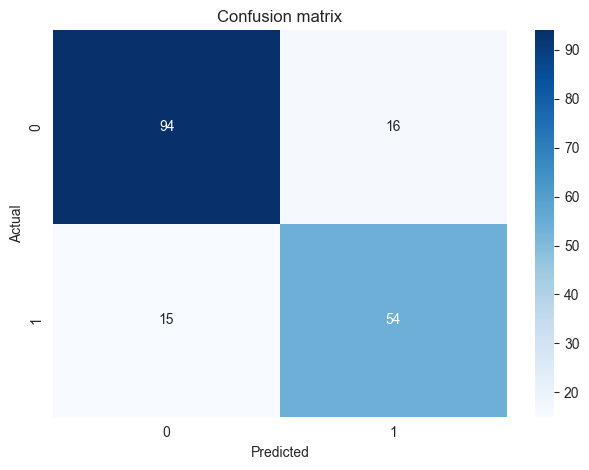

In [26]:
cof_matrix  = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cof_matrix, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Feature importance

In [30]:
model.best_estimator_['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_feature)

array(['pclass_1.0', 'pclass_2.0', 'pclass_3.0', 'age_0.42', 'age_0.67',
       'age_0.75', 'age_0.83', 'age_0.92', 'age_1.0', 'age_2.0',
       'age_3.0', 'age_4.0', 'age_5.0', 'age_6.0', 'age_7.0', 'age_8.0',
       'age_9.0', 'age_10.0', 'age_11.0', 'age_12.0', 'age_13.0',
       'age_14.0', 'age_14.5', 'age_15.0', 'age_16.0', 'age_17.0',
       'age_18.0', 'age_19.0', 'age_20.0', 'age_20.5', 'age_21.0',
       'age_22.0', 'age_23.0', 'age_24.0', 'age_25.0', 'age_26.0',
       'age_27.0', 'age_28.0', 'age_28.5', 'age_29.0', 'age_30.0',
       'age_30.5', 'age_31.0', 'age_32.0', 'age_32.5', 'age_33.0',
       'age_34.0', 'age_34.5', 'age_35.0', 'age_36.0', 'age_36.5',
       'age_37.0', 'age_38.0', 'age_39.0', 'age_40.0', 'age_40.5',
       'age_41.0', 'age_42.0', 'age_43.0', 'age_44.0', 'age_45.0',
       'age_45.5', 'age_46.0', 'age_47.0', 'age_48.0', 'age_49.0',
       'age_50.0', 'age_51.0', 'age_52.0', 'age_54.0', 'age_55.0',
       'age_55.5', 'age_56.0', 'age_57.0', 'age_58.0'

In [31]:
feature_importances = model.best_estimator_['classifier'].feature_importances_

# Combine the numerical and one-hot encoded categorical feature names
feature_names = numberical_feature + list(model.best_estimator_['preprocessor']
                                        .named_transformers_['cat']
                                        .named_steps['onehot']
                                        .get_feature_names_out(categorical_feature))

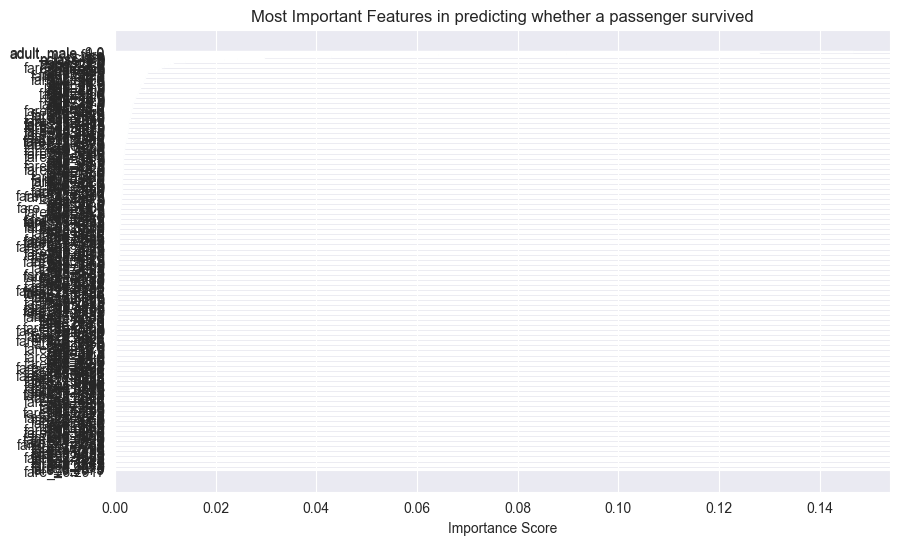


Test set accuracy: 82.68%


In [32]:
importance_df = pd.DataFrame({'Feature': feature_names,
                              'Importance': feature_importances
                             }).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Most Important Features in predicting whether a passenger survived')
plt.xlabel('Importance Score')
plt.show()

# Print test score
test_score = model.score(X_test, y_test)
print(f"\nTest set accuracy: {test_score:.2%}")

In [33]:
# Replace RandomForestClassifier with LogisticRegression
pipeline.set_params(classifier=LogisticRegression(random_state=42))

# update the model's estimator to use the new pipeline
model.estimator = pipeline

# Define a new grid with Logistic Regression parameters
param_grid = {
    # 'classifier__n_estimators': [50, 100],
    # 'classifier__max_depth': [None, 10, 20],
    # 'classifier__min_samples_split': [2, 5],
    'classifier__solver' : ['liblinear'],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__class_weight' : [None, 'balanced']
}

model.param_grid = param_grid

# Fit the updated pipeline with Logistic Regression
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=No

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84       110
           1       0.72      0.80      0.76        69

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.80       179
weighted avg       0.81      0.80      0.81       179



In [35]:
# Display the clasification report for the new model and compare the results to your previous model.

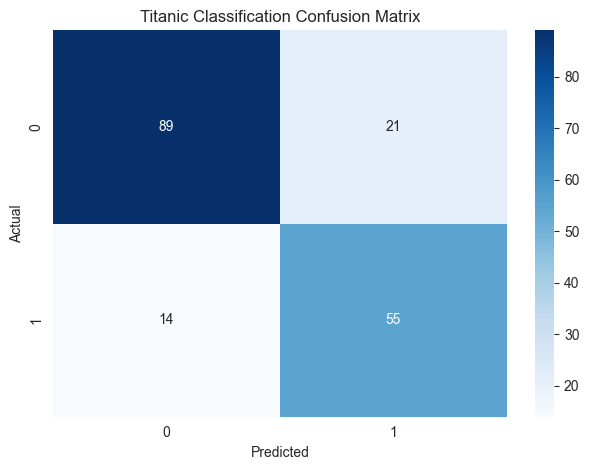

In [36]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

plt.title('Titanic Classification Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [38]:
coefficients = model.best_estimator_.named_steps['classifier'].coef_[0]

# Combine numerical and categorical feature names
numerical_feature_names = numberical_feature
categorical_feature_names = (model.best_estimator_.named_steps['preprocessor']
                                     .named_transformers_['cat']
                                     .named_steps['onehot']
                                     .get_feature_names_out(categorical_feature)
                            )
feature_names = numerical_feature_names + list(categorical_feature_names)

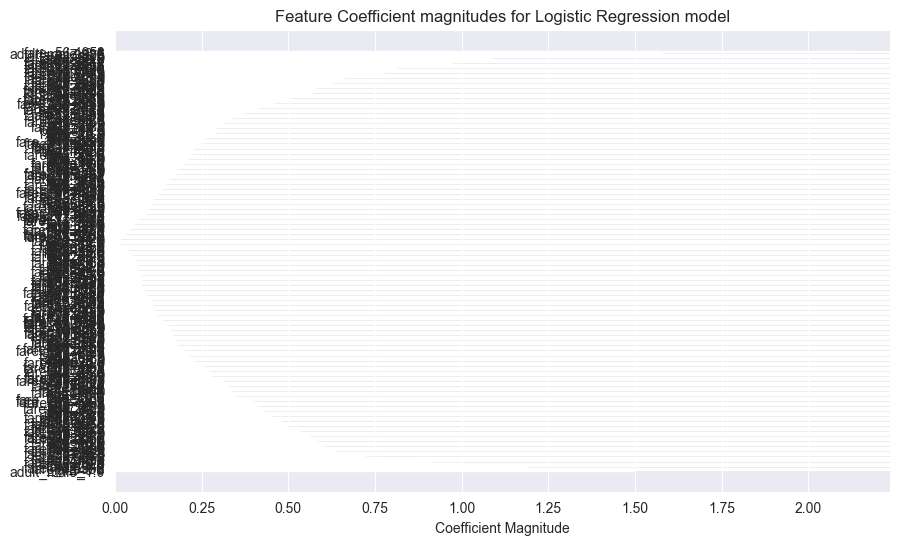


Test set accuracy: 80.45%


In [39]:
importance_df = pd.DataFrame({'Feature': feature_names,
                              'Coefficient': coefficients
                             }).sort_values(by='Coefficient', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Coefficient'].abs(), color='skyblue')
plt.gca().invert_yaxis()
plt.title('Feature Coefficient magnitudes for Logistic Regression model')
plt.xlabel('Coefficient Magnitude')
plt.show()

# Print test score
test_score = model.score(X_test, y_test)
print(f"\nTest set accuracy: {test_score:.2%}")